In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
import os
import datetime
import sklearn
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timezone

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.seasonal import seasonal_decompose



In [175]:
pd.options.display.max_columns = None
%matplotlib inline
sns.set(style="darkgrid")
random_seed = 42

In [108]:
chd = os.chdir('C:/Users/UvA/Waternet/data/')
CURR_DIR = os.getcwd()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [111]:
# Read data  
#df = pd.read_excel(CURR_DIR + '\current\Output_AlleObjecten_20191231.xlsx', sheet_name='Details')
df = pd.read_excel(CURR_DIR + '\current\Output_Objecten_Jaarverbruik_2019.xlsx', sheet_name='Details')

In [112]:
budf = df
data = budf
df = data

In [113]:
df = df[(df['OBJECT_TYPE_NAAM'] != 'ENG')]
df = df[(df['OBJECT_TYPE_NAAM'] != 'IND')]
df = df[(df['OBJECT_TYPE_NAAM'] != 'GZB')]

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503685 entries, 18 to 503892
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   PEILDATUM                     503685 non-null  object 
 1   PEILDATUM_BEGIN               503685 non-null  object 
 2   PEILDATUM_EIND                503685 non-null  object 
 3   OBJECT_TYPE_NAAM              503685 non-null  object 
 4   OBJECT_TYPE_SINDS             502773 non-null  object 
 5   OBJECT_TYPE_NIEUW             503685 non-null  object 
 6   OBJECT_TYPE_NIEUW_GROEPERING  503685 non-null  object 
 7   OBJECT_STATUS_NAAM            503684 non-null  object 
 8   OBJECT_STATUS_SINDS           473934 non-null  object 
 9   OBJECT_JAARVERBRUIK           381852 non-null  float64
 10  OBJECT_#METINGEN              381852 non-null  float64
dtypes: float64(2), object(9)
memory usage: 46.1+ MB


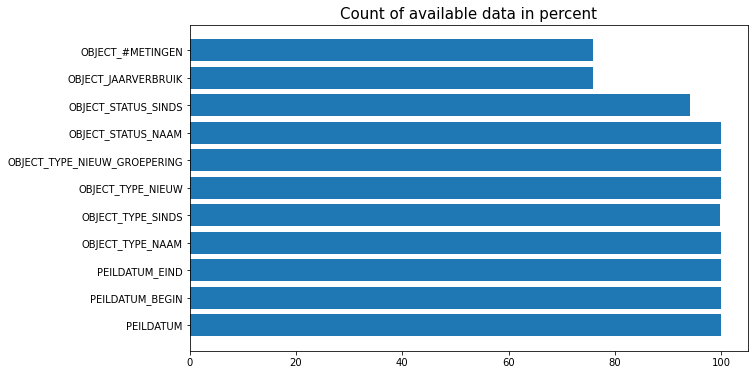

In [115]:
variables = df.columns
count = []
for variable in variables:
    length = df[variable].count()
    count.append(length)
   
count_pct = np.round(100 * pd.Series(count) / len(df), 2)
#Plot number of available data per variable
plt.figure(figsize=(10,6))
plt.barh(variables, count_pct)
plt.title('Count of available data in percent', fontsize=15)
plt.show()

In [116]:
#number of empty metingen
print("Entries with zero #METINGEN: ", len(df[df['OBJECT_#METINGEN'] == 0]))
print("Entries with zero #METINGEN: ", len(df[df['OBJECT_#METINGEN'].isnull()]))
print("Other columns?",df.isnull().sum())

Entries with zero #METINGEN:  0
Entries with zero #METINGEN:  121833
Other columns? PEILDATUM                            0
PEILDATUM_BEGIN                      0
PEILDATUM_EIND                       0
OBJECT_TYPE_NAAM                     0
OBJECT_TYPE_SINDS                  912
OBJECT_TYPE_NIEUW                    0
OBJECT_TYPE_NIEUW_GROEPERING         0
OBJECT_STATUS_NAAM                   1
OBJECT_STATUS_SINDS              29751
OBJECT_JAARVERBRUIK             121833
OBJECT_#METINGEN                121833
dtype: int64


In [117]:
df = df[df['OBJECT_#METINGEN'].notna()]

In [119]:
#df.drop(columns=["OBJECT_TYPE_TOT","OBJECT_STATUS_TOT"], inplace=True)

In [120]:
df = df.fillna(0)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381852 entries, 18 to 382044
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   PEILDATUM                     381852 non-null  object 
 1   PEILDATUM_BEGIN               381852 non-null  object 
 2   PEILDATUM_EIND                381852 non-null  object 
 3   OBJECT_TYPE_NAAM              381852 non-null  object 
 4   OBJECT_TYPE_SINDS             381852 non-null  object 
 5   OBJECT_TYPE_NIEUW             381852 non-null  object 
 6   OBJECT_TYPE_NIEUW_GROEPERING  381852 non-null  object 
 7   OBJECT_STATUS_NAAM            381852 non-null  object 
 8   OBJECT_STATUS_SINDS           381852 non-null  object 
 9   OBJECT_JAARVERBRUIK           381852 non-null  float64
 10  OBJECT_#METINGEN              381852 non-null  float64
dtypes: float64(2), object(9)
memory usage: 35.0+ MB


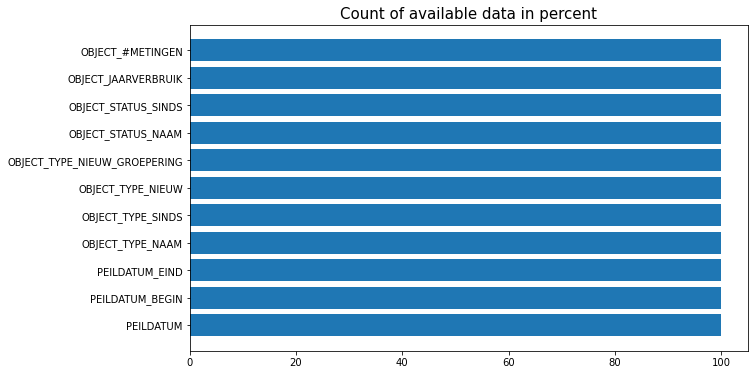

In [122]:
variables = df.columns
count = []
for variable in variables:
    length = df[variable].count()
    count.append(length)
   
count_pct = np.round(100 * pd.Series(count) / len(df), 2)
#Plot number of available data per variable
plt.figure(figsize=(10,6))
plt.barh(variables, count_pct)
plt.title('Count of available data in percent', fontsize=15)
plt.show()

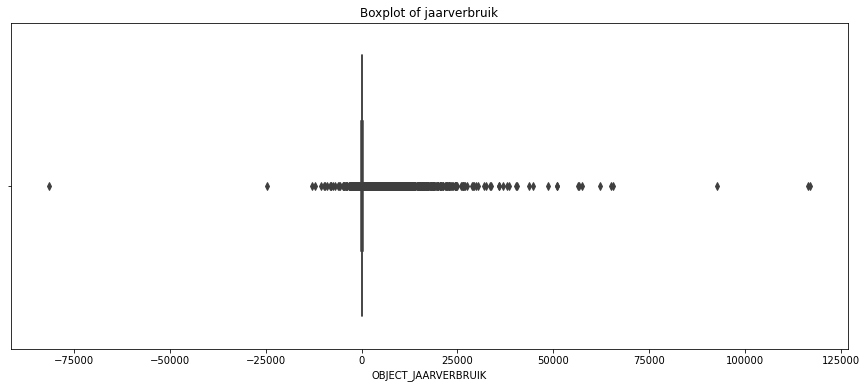

In [123]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='OBJECT_JAARVERBRUIK', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of jaarverbruik')
plt.show()

In [128]:
df.head(1)

,PEILDATUM,PEILDATUM_BEGIN,PEILDATUM_EIND,OBJECT_TYPE_NAAM,OBJECT_TYPE_SINDS,OBJECT_TYPE_NIEUW,OBJECT_TYPE_NIEUW_GROEPERING,OBJECT_STATUS_NAAM,OBJECT_STATUS_SINDS,OBJECT_JAARVERBRUIK,OBJECT_#METINGEN
18,2019-12-31,2019-01-01,2019-12-31 23:59:59,KZB,2011-02-25 00:00:00.000,Mega,Bemeten,Actief,2011-02-26 00:00:00.000,116841.0,1.0


In [135]:
df['PEILDATUM'] = pd.to_datetime(df['PEILDATUM'])
df['PEILDATUM_BEGIN'] = pd.to_datetime(df['PEILDATUM_BEGIN'])
df['PEILDATUM_EIND'] = pd.to_datetime(df['PEILDATUM_EIND'])
df['OBJECT_TYPE_SINDS'] = pd.to_datetime(df['OBJECT_TYPE_SINDS'])
#df['OBJECT_TYPE_SINDS (aanwezig aansluiting/object)'] = pd.to_datetime(df['OBJECT_TYPE_SINDS (aanwezig aansluiting/object)'])
#df['OBJECT_STATUS_SINDS (opgevoerde huidige klant)'] = pd.to_datetime(df['OBJECT_STATUS_SINDS (opgevoerde huidige klant)'])

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381852 entries, 18 to 382044
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   PEILDATUM                     381852 non-null  datetime64[ns]
 1   PEILDATUM_BEGIN               381852 non-null  datetime64[ns]
 2   PEILDATUM_EIND                381852 non-null  datetime64[ns]
 3   OBJECT_TYPE_NAAM              381852 non-null  object        
 4   OBJECT_TYPE_SINDS             381852 non-null  datetime64[ns]
 5   OBJECT_TYPE_NIEUW             381852 non-null  object        
 6   OBJECT_TYPE_NIEUW_GROEPERING  381852 non-null  object        
 7   OBJECT_STATUS_NAAM            381852 non-null  object        
 8   OBJECT_STATUS_SINDS           381852 non-null  object        
 9   OBJECT_JAARVERBRUIK           381852 non-null  float64       
 10  OBJECT_#METINGEN              381852 non-null  float64       
dtypes: datetime6

In [164]:
#to be sure..
df = df.loc[data.OBJECT_TYPE_SINDS.between('2010-01-01', '2020-08-31')]

In [179]:
df2 = df.filter(["OBJECT_TYPE_SINDS", "OBJECT_JAARVERBRUIK"]) 


In [180]:
df2.head()

,OBJECT_TYPE_SINDS,OBJECT_JAARVERBRUIK
18,2011-02-25,116841.0
19,2011-12-21,116516.0
20,2016-01-14,92658.0
31,2017-08-10,62291.0
34,2010-02-18,57472.0


In [181]:
df2['OBJECT_TYPE_SINDS'].unique()

array(['2011-02-25T00:00:00.000000000', '2011-12-21T00:00:00.000000000',
       '2016-01-14T00:00:00.000000000', ...,
       '2013-10-20T00:00:00.000000000', '2014-02-07T00:00:00.000000000',
       '2017-05-07T00:00:00.000000000'], dtype='datetime64[ns]')

In [182]:
df2 = df2.sort_values(by = 'OBJECT_TYPE_SINDS')

In [183]:
df2.head()

,OBJECT_TYPE_SINDS,OBJECT_JAARVERBRUIK
213630,2010-01-01,69.0
205634,2010-01-01,72.0
119869,2010-01-01,112.0
206599,2010-01-01,72.0
20433,2010-01-01,253.0


Text(0.5, 1.0, 'Total object verbuik')

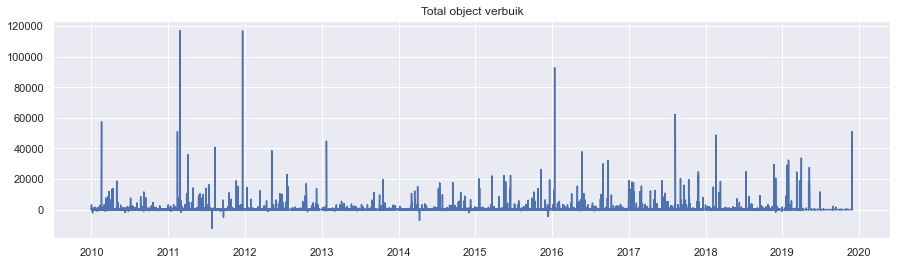

In [190]:
x = df2['OBJECT_TYPE_SINDS']
y = df2['OBJECT_JAARVERBRUIK']

plt.figure(figsize=(15,4))
plt.plot(x, y)
plt.title("Total object verbuik")

### TO Work out
* Herhaling maar dan met gemiddelden
* Check status: active keep, not active remove?
* what about negative values (= returning money to customer)
* Not sure what #Metingen means

In [215]:
#Dates to Years, Months & Days
print (df2['OBJECT_TYPE_SINDS'].dtype)

df2['year'] = df2['OBJECT_TYPE_SINDS'].dt.year

df2['month'] = df2['OBJECT_TYPE_SINDS'].dt.month

df2['day'] = df2['OBJECT_TYPE_SINDS'].dt.day

datetime64[ns]


In [ ]:
### df2.head()

In [ ]:
df_monthly = df2.copy()
#df_monthly.index = df_monthly.index.month
df_averages = df_monthly.groupby(df_monthly.index).mean()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.flat

sns.boxplot(x=df_monthly.index, y="OBJECT_JAARVERBRUIK", palette="coolwarm", data=df_monthly, ax=axs[0])
sns.barplot(x=df_averages.index, y="OBJECT_JAARVERBRUIK", palette="coolwarm", data=df_averages, ax=axs[1])

#plt.tight_layout()
plt.show()